AgglomerativeClustering

层次聚类(凝聚聚类)

In [50]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import linkage, dendrogram, ward
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [51]:
data = pd.read_excel('cost_data.xlsx', index_col=0)
X = data.iloc[:,:8]
X

,食品,衣着,家庭设备,医疗,交通,娱乐,居住,杂项
省份,,,,,,,,
北京,2959.19,730.79,749.41,513.34,467.87,1141.82,478.42,457.64
天津,2459.77,495.47,697.33,302.87,284.19,735.97,570.84,305.08
河北,1495.63,515.90,362.37,285.32,272.95,540.58,364.91,188.63
山西,1406.33,477.77,290.15,208.57,201.50,414.72,281.84,212.10
内蒙古,1303.97,524.29,254.83,192.17,249.81,463.09,287.87,192.96
辽宁,1730.84,553.90,246.91,279.81,239.18,445.20,330.24,163.86
吉林,1561.86,492.42,200.49,218.36,220.69,459.62,360.48,147.76
黑龙江,1410.11,510.71,211.88,277.11,224.65,376.82,317.61,152.85
上海,3712.31,550.74,893.37,346.93,527.00,1034.98,720.33,462.03


In [52]:
# Initialize AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='average')

# Fit the model
model.fit(X)

# Predict cluster labels
print("Cluster labels:", model.labels_)

pd.DataFrame(model.labels_, index=data.index).T

Cluster labels: [2 2 1 1 1 1 1 1 0 1 2 1 2 1 1 1 1 1 0 1 1 1 1 1 1 2 1 1 1 1 1]


省份,北京,天津,河北,山西,内蒙古,辽宁,吉林,黑龙江,上海,江苏,...,重庆,四川,贵州,云南,西藏,陕西,甘肃,青海,宁夏,新疆
0,2,2,1,1,1,1,1,1,0,1,...,1,1,1,1,2,1,1,1,1,1


聚类树状图

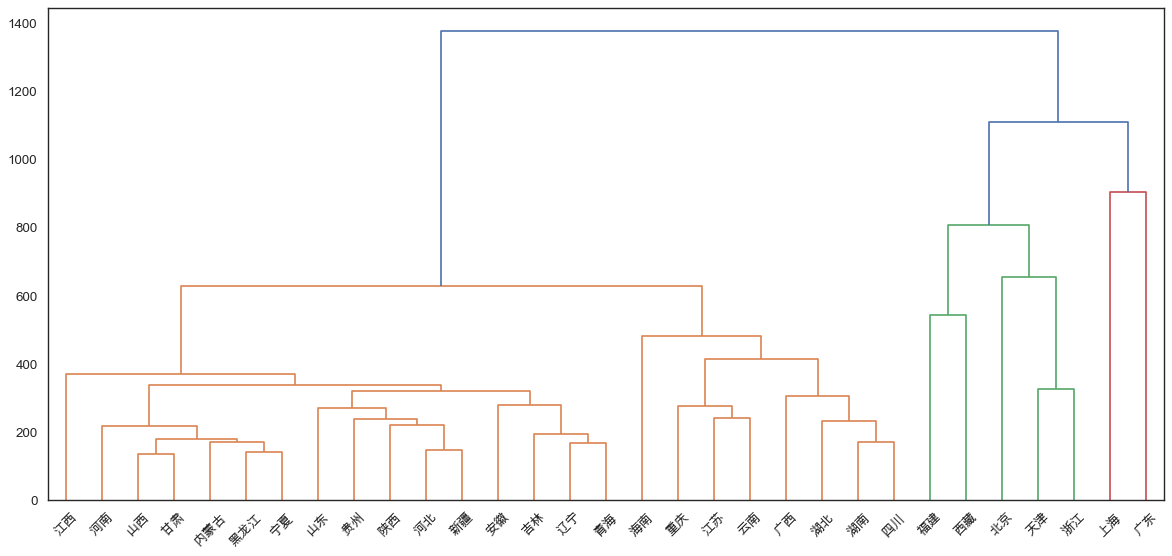

In [56]:
sns.set(style='white', font='Arial Unicode MS')
plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
# 设置坐标轴标签
labels = X.index
# method=['ward', 'complete', 'average', 'single'] : ['方差最小化', '最长距离', '组间平均', '最短距离']
# metric='euclidean'欧氏距离
Z = linkage(X, method='average', metric='euclidean')
p = dendrogram(Z, labels=labels)
plt.tick_params(labelsize=12)
plt.show()

In [57]:
np.set_printoptions(suppress=True)  # 不使用用科学计数法
# Z共有四列组成，第一字段与第二字段分别为聚类簇的编号，
# 在初始距离前每个初始值被从0~n-1进行标识，
# 每生成一个新的聚类簇就在此基础上增加一对新的聚类簇进行标识，
# 第三个字段表示前两个聚类簇之间的距离，
# 第四个字段表示新生成聚类簇所包含的元素的个数。
Z

array([[   3.        ,   27.        ,  135.69823949,    2.        ],
       [   7.        ,   29.        ,  142.46793043,    2.        ],
       [   2.        ,   30.        ,  148.86839994,    2.        ],
       [   5.        ,   28.        ,  167.90035348,    2.        ],
       [   4.        ,   32.        ,  171.80573429,    3.        ],
       [  16.        ,   22.        ,  172.11734282,    2.        ],
       [  31.        ,   35.        ,  179.81263143,    5.        ],
       [   6.        ,   34.        ,  195.11534687,    3.        ],
       [  15.        ,   37.        ,  217.76524763,    6.        ],
       [  26.        ,   33.        ,  220.75140607,    3.        ],
       [  17.        ,   36.        ,  232.32101474,    3.        ],
       [  23.        ,   40.        ,  239.41913195,    4.        ],
       [   9.        ,   24.        ,  240.67074957,    2.        ],
       [  14.        ,   42.        ,  270.11212469,    5.        ],
       [  21.        ,   43.      

轮廓系数

最佳值为1，最差值为-1。接近0的值表示重叠的群集。负值通常表示样本已分配给错误的聚类，因为不同的聚类更为相似。

In [58]:
# 所有点的平均轮廓系数
silhouette_score(X, model.labels_)

0.4806139889027354

In [59]:
# 单个点的轮廓系数
silhouette_samples(X, model.labels_)

array([ 0.02459711,  0.32797161,  0.70330704,  0.69765296,  0.66645015,
        0.66900038,  0.70792483,  0.68409804,  0.27322275,  0.06522918,
        0.40667797,  0.62369265,  0.35572212,  0.65386754,  0.6058286 ,
        0.68682211,  0.46822341,  0.61827872,  0.07002961,  0.37607378,
        0.38871666, -0.21106407,  0.51137157,  0.67818945,  0.14574798,
        0.25456565,  0.67669386,  0.70878236,  0.69366214,  0.67353563,
        0.69416185])